# Processing

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#https://www.kaggle.com/chethan187/ensemble-techniques

import warnings
warnings.filterwarnings('ignore')

# import data modelling libraries

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [340]:
df = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/data')
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
1,57,7,1,3,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
2,37,7,1,3,1,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,1,1,6,1,1,999,0,1,93.994,-36.4,4.857,0


In [341]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
1,57,7,1,3,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
2,37,7,1,3,1,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,1,1,6,1,1,999,0,1,93.994,-36.4,4.857,0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38205 entries, 0 to 38204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38205 non-null  int64  
 1   job             38205 non-null  int64  
 2   marital         38205 non-null  int64  
 3   education       38205 non-null  int64  
 4   housing         38205 non-null  int64  
 5   loan            38205 non-null  int64  
 6   contact         38205 non-null  int64  
 7   month           38205 non-null  int64  
 8   day_of_week     38205 non-null  int64  
 9   campaign        38205 non-null  int64  
 10  pdays           38205 non-null  int64  
 11  previous        38205 non-null  int64  
 12  poutcome        38205 non-null  int64  
 13  cons.price.idx  38205 non-null  float64
 14  cons.conf.idx   38205 non-null  float64
 15  euribor3m       38205 non-null  float64
 16  y               38205 non-null  int64  
dtypes: float64(3), int64(14)
memory

#### Split Data Into Train and Test

In [343]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set

df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [344]:
df_train.shape, df_test.shape

((30564, 17), (7641, 17))

#### Dividing into X and Y sets for the model building

In [345]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [346]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [347]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30564, 16), (30564,), (7641, 16), (7641,))

# Modeling

### Base Model: Logistic Regression

    Logistic Regression: A Supervised classification algorithm. It used Sigmoid function for classifying the binary labelled output variables.

In [394]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logit_model = LogisticRegression()
LG_model = logit_model.fit(X_train, y_train)

logit_predict = logit_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, LG_model.predict_proba(X)[:,1])

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, logit_predict))

print(classification_report(y_test, logit_predict))                                                     

LogitRegression = (cross_val_score(logit_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

confusion matrix: 

 [[6736   80]
 [ 642  183]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6816
           1       0.70      0.22      0.34       825

    accuracy                           0.91      7641
   macro avg       0.80      0.61      0.64      7641
weighted avg       0.89      0.91      0.88      7641



Notes on Results:

- F1 Score is a bit low.I will try to improve it by adding weight class since my target dataset is unbalanced.
- AUC score is good
- Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Negatives because the cost would be too hight for the business.

#### Logistic Regression (Class_Weight) balance since our data is imbalanced

In [393]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logit_model = LogisticRegression(class_weight='balanced')
LG_model = logit_model.fit(X_train, y_train)

logit_predict = logit_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, LG_model.predict_proba(X)[:,1])

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, logit_predict))

print(classification_report(y_test, logit_predict))                                                     

LogitRegression = (cross_val_score(logit_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

confusion matrix: 

 [[5319 1497]
 [ 261  564]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      6816
           1       0.27      0.68      0.39       825

    accuracy                           0.77      7641
   macro avg       0.61      0.73      0.62      7641
weighted avg       0.88      0.77      0.81      7641



Notes on Results:
    
- F1 Score: improved by 15% with Logistic Regression (class_balance) 


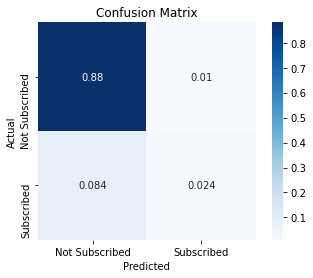

In [404]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, logit_predict, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, logit_predict)
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/confussion_matrix.png')

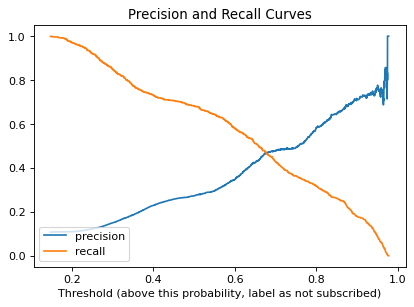

In [361]:
#precision/recall graph LG_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, LG_model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

### Naive Bayes

    The Naive Bayes classifier: is a probabilistic machine learning model that's used for classification task. The crux of classifier is based on the Bayes theorem Gaussian - When the predictors take up a continous value and are not discrete, we assume that these values are sampled from a gaussian distribution

In [392]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
NB_model = naive_model.fit(X_train, y_train)
NB_predict = naive_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, NB_model.predict_proba(X)[:,1])

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, NB_predict))

print(classification_report(y_test, NB_predict))                                                           


Gausian = (cross_val_score(naive_model, X_train, y_train, cv=None, n_jobs=1, scoring='accuracy').mean())

confusion matrix: 

 [[6167  649]
 [ 534  291]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6816
           1       0.31      0.35      0.33       825

    accuracy                           0.85      7641
   macro avg       0.61      0.63      0.62      7641
weighted avg       0.85      0.85      0.85      7641



Notes on Results:
    
- Accuracy: Score is ok but not that great. Logistic Regression (class_weight) is still the best F1 score.


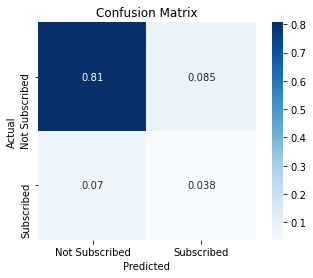

In [405]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, NB_predict, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, NB_predict)
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/confussion_matrix_NB_predict.png')

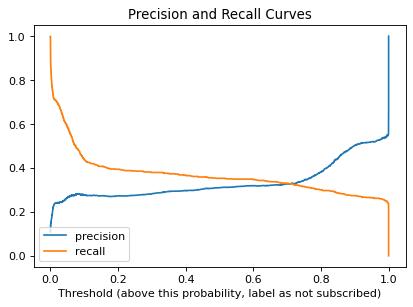

In [372]:
#precision/recall graph NB_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, NB_model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

### Random Forest

    A Random Forest: is a meta estimator that fits a nummber of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [390]:
from sklearn.ensemble import RandomForestClassifier

rfcl_model = RandomForestClassifier()
RF_model = rfcl_model.fit(X_train, y_train)

rf_predict = rfcl_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, RF_model.predict_proba(X)[:,1])

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, rf_predict))

print(classification_report(y_test, rf_predict))

RandomForest = (cross_val_score(rfcl_model, X_train, y_train, cv=None, n_jobs=1, scoring='accuracy').mean())

confusion matrix: 

 [[6614  202]
 [ 582  243]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6816
           1       0.55      0.29      0.38       825

    accuracy                           0.90      7641
   macro avg       0.73      0.63      0.66      7641
weighted avg       0.88      0.90      0.88      7641



Notes on Results:

- F1 Score is good but still lower than LG.

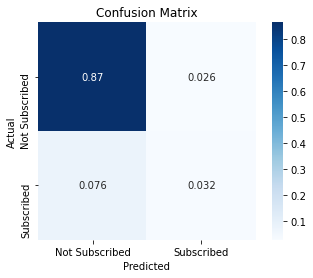

In [406]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, rf_predict, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, rf_predict)
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/confussion_matrix_rf_predict.png')

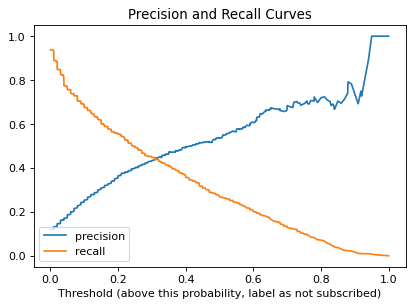

In [378]:
#precision/recall graph RF_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, RF_model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

### Compare performances of all the models

In [379]:
models = pd.DataFrame({'Models': ['Gausian', 'LogitRegression', 'RandomForest'],
                       'Score': [Gausian, LogitRegression, RandomForest]})
models.sort_values(by='Score', ascending = False)

,Models,Score
2,RandomForest,0.892488
0,Gausian,0.841120
1,LogitRegression,0.768158


#### Machine Learning models used:

1. Logistic Regression:

    A Supervised classification algorithm. It used Sigmoid function for classifying the binary labelled output variables.

2. Gaussian Naive Bayes:

    The Naive Bayes classifier is a probabilistic machine learning model that's used for classification task. The crux of classifier is based on the Bayes theorem
Gaussian - When the predictors take up a continous value and are not discrete, we assume that these values are sampled from a gaussian distribution

3. Random Forest:

    A random forest is a meta estimator that fits a nummber of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

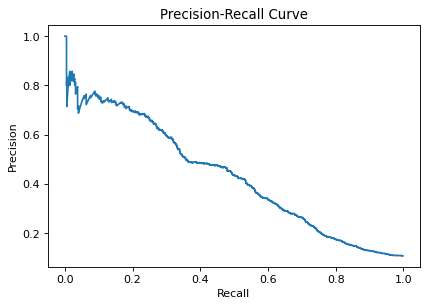

In [362]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.7759966744913929


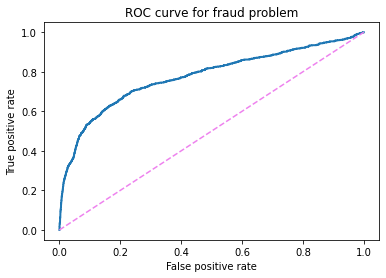

In [384]:
# LG Model

# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, LG_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, LG_model.predict_proba(X_test)[:,1]))

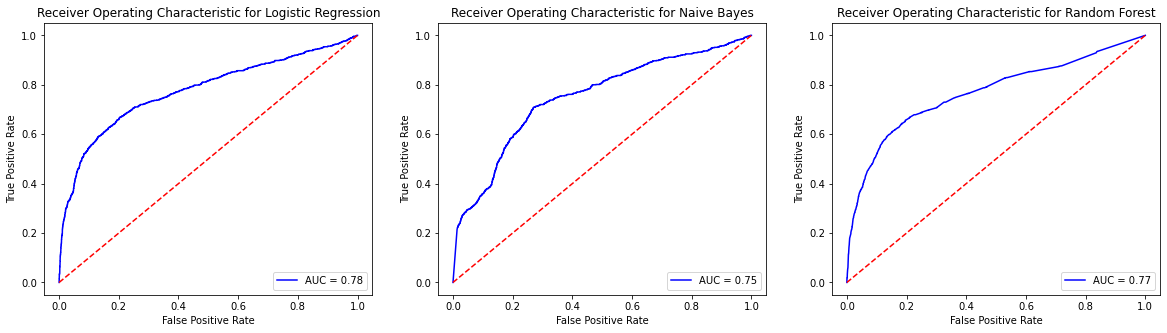

In [407]:
plt.figure(figsize=(20,5))

probs = NB_model.predict_proba(X_test)                               #ROC Curve for Naive Bayes 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)     
           
plt.subplot(1,3,2)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


#plt.figure(figsize=(10,5))
probs = logit_model.predict_proba(X_test)                            #ROC Curve for Logistic Regression
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(1,3,1)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



#plt.figure(figsize=(10,5))
probs = RF_model.predict_proba(X_test)                                 #ROC Curve for Random Forest 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(1,3,3)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/ROC_comparison.png')

#### Below are the metrics used for each model to know the its performance

    Accuracy: One metric for evaluating classification model. Accuracy the fraction of predictions our model got right. It is calculated in terms of positive and negatives values
Accuracy = True Positive + True Negative / True Positives + True Negatives + False Positives + False Negatives

    F1 Score: It considers both the precision p and recall r of the test to compute the score. p is the number of correct positive results divided by the number of all positive results

    AUROC Score: This score gives us a good idea of how well the model performed. Basically helps to determine which of the used models predicts the classes best

    cross_val_score: The accuracy of the model is the average of the accuracy of each fold

    Scoring on Training and Testing dataset using model.score(): Estimators implement a score method. Scores are between 0 and 1m with a larger score indicating a better fit. This is used to check whether the model has any underfitting or overfitting issues. 

    Overfitting: Where the model observes more noise from the training data, while performing poorly on the new data set i.e Test data. 

    Underfitting: Where the model poorly performs on the training data by not considering the significant features

    Confusion Matrix: Used to get the performance of the model on a set of test data for which the true values are known


#### Conclusion:
    
    Final Result: From all the above models Logistic Regression (balanced) performed better with F1 score of 0.39 (16% better performance than the basic Logistic Regression model), AUC - 98% (29% better performance than the basic model). Scored well on training and test data as well no issues of overfitting/underfitting.
 